# Feature Engineering Notebook

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


---

## 3. Feature engineering

### Load price data and group data by month and company


In [4]:
price_df = pd.read_csv('price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [5]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

We can see that **price_date** is only at the beginning of the month, so we don't need to extract month from date to group our data by month.

In [6]:
# Group off-peak prices by companies and month. Note that "price_date" is always on the first date of the month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean','price_mid_peak_var': 'mean','price_mid_peak_fix': 'mean','price_peak_fix': 'mean','price_peak_var': 'mean'}).reset_index()
monthly_price_by_id.head(3)

,id,price_date,price_off_peak_var,price_off_peak_fix,price_mid_peak_var,price_mid_peak_fix,price_peak_fix,price_peak_var
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.070232,16.226389,24.339581,0.103975
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969,0.070232,16.226389,24.339581,0.103975
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885,0.073773,16.291555,24.437330,0.105842


In [7]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index() # Grab first element of the group -> Jan
dec_prices = monthly_price_by_id.groupby('id').last().reset_index() # Grab last element of the group -> Dec

### Calculate the offpeak difference between January and December

In [8]:
# Calculate the difference
# Merge jan and dec on 'id'
offpeak_diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
offpeak_diff['offpeak_diff_dec_january_energy'] = offpeak_diff['dec_1'] - offpeak_diff['price_off_peak_var']
offpeak_diff['offpeak_diff_dec_january_power'] = offpeak_diff['dec_2'] - offpeak_diff['price_off_peak_fix']
offpeak_diff = offpeak_diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
offpeak_diff.head(5)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


### Calculate the peak difference between January and December

In [9]:
peak_diff = pd.merge(dec_prices.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_prices.drop(columns= 'price_date'), on = 'id')
peak_diff['peak_diff_dec_january_energy'] = peak_diff['dec_1'] - peak_diff['price_peak_var']
peak_diff['peak_diff_dec_january_power'] = peak_diff['dec_2'] - peak_diff['price_peak_fix']
peak_diff = peak_diff[['id', 'peak_diff_dec_january_energy', 'peak_diff_dec_january_power']]
peak_diff.head(5)

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


### Calculate the peak difference between January and December

In [10]:
midpeak_diff = pd.merge(dec_prices.rename(columns={'price_mid_peak_var': 'dec_1', 'price_mid_peak_fix': 'dec_2'}), jan_prices.drop(columns= 'price_date'), on = 'id')
midpeak_diff['midpeak_diff_dec_january_energy'] = midpeak_diff['dec_1'] - midpeak_diff['price_mid_peak_var']
midpeak_diff['midpeak_diff_dec_january_power'] = midpeak_diff['dec_2'] - midpeak_diff['price_mid_peak_fix']
midpeak_diff = midpeak_diff[['id', 'midpeak_diff_dec_january_energy', 'midpeak_diff_dec_january_power']]
midpeak_diff.head(5)

,id,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


We proceed to merge all these field difference into one same df:

In [11]:
FE_price_data = pd.merge(offpeak_diff, midpeak_diff, on = "id")
FE_price_data = pd.merge(FE_price_data, peak_diff, on = "id")
FE_price_data.head(5)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.003487,0.065166,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,0.000763,0.065166,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


### Calculate max change across periods and months

We calculate the difference between: offpeak - peak, offpeak - midpeak, midpeak - peak

In [12]:
mean_price_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var' : 'mean',
    'price_peak_var' : 'mean',
    'price_mid_peak_var' : 'mean',
    'price_off_peak_fix' : 'mean',
    'price_peak_fix' : 'mean',
    'price_mid_peak_fix' : 'mean'
}).reset_index()

mean_price_by_month.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [13]:
mean_price_by_month['offpeak_peak_var'] = - mean_price_by_month['price_peak_var'] +  mean_price_by_month['price_off_peak_var']
mean_price_by_month['offpeak_midpeak_var'] = - mean_price_by_month['price_mid_peak_var'] + mean_price_by_month['price_off_peak_var']
mean_price_by_month['midpeak_peak_var'] = mean_price_by_month['price_peak_var'] - mean_price_by_month['price_mid_peak_var']
mean_price_by_month['offpeak_peak_fix'] = - mean_price_by_month['price_peak_fix'] + mean_price_by_month['price_off_peak_fix']
mean_price_by_month['offpeak_midpeak_fix'] = - mean_price_by_month['price_mid_peak_fix'] + mean_price_by_month['price_off_peak_fix']
mean_price_by_month['midpeak_peak_fix'] = mean_price_by_month['price_peak_fix'] - mean_price_by_month['price_mid_peak_fix']

In [14]:
# Find max change for each company
mean_price_by_month = mean_price_by_month.groupby('id').agg({
    'offpeak_peak_var': 'max',
    'offpeak_midpeak_var': 'max',
    'midpeak_peak_var': 'max',
    'offpeak_peak_fix': 'max',
    'offpeak_midpeak_fix': 'max',
    'midpeak_peak_fix': 'max',
}).reset_index().rename(
    columns = {
    'offpeak_peak_var': 'max_diff_offpeak_peak_var',
    'offpeak_midpeak_var': 'max_diff_offpeak_midpeak_var',
    'midpeak_peak_var': 'max_diff_midpeak_peak_var',
    'offpeak_peak_fix': 'max_diff_offpeak_peak_fix',
    'offpeak_midpeak_fix': 'max_diff_offpeak_midpeak_fix',
    'midpeak_peak_fix': 'max_diff_midpeak_peak_fix',
    }
)

In [15]:
# Sanity check
mean_price_by_month.head(5)

,id,max_diff_offpeak_peak_var,max_diff_offpeak_midpeak_var,max_diff_midpeak_peak_var,max_diff_offpeak_peak_fix,max_diff_offpeak_midpeak_fix,max_diff_midpeak_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.022225,0.055866,0.033743,16.291555,24.437330,8.145775
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.148405,0.000000,44.444710,44.444710,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.205742,0.000000,45.944710,45.944710,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.022581,0.054440,0.031859,16.291555,24.437330,8.145775
4,00114d74e963e47177db89bc70108537,0.149902,0.149902,0.000000,44.266931,44.266931,0.000000


In [16]:
# Join the price_df new parameters:
FE_price_data = pd.merge(FE_price_data, mean_price_by_month, on = 'id')

In [17]:
# Merge with orginal df
df = pd.merge(FE_price_data, df, on = 'id')

## 4. Feature Engineer - clean_data_after_EDA

### Cleaning the categorical fields: 'channel_sales', 'has_gas', 'origin_up'.

In [18]:
# Create the encoder
enc = preprocessing.OneHotEncoder(handle_unknown = 'ignore')

In [19]:
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [20]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [21]:
df[['origin_up', 'channel_sales']].fillna(0)

,origin_up,channel_sales
0,kamkkxfxxuwbdslkwifmmcsiusiuosws,foosdfpfkusacimwkcsosbicdxkicaua
1,kamkkxfxxuwbdslkwifmmcsiusiuosws,MISSING
2,lxidpiddsbxsbosboudacockeimpuepw,usilxuppasemubllopkaafesmlibmsdf
3,kamkkxfxxuwbdslkwifmmcsiusiuosws,ewpakwlliwisiwduibdlfmalxowmwpci
4,lxidpiddsbxsbosboudacockeimpuepw,foosdfpfkusacimwkcsosbicdxkicaua
...,...,...
14601,ldkssxwpmemidmecebumciepifcamkci,lmkebamcaaclubfxadlmueccxoimlema
14602,lxidpiddsbxsbosboudacockeimpuepw,ewpakwlliwisiwduibdlfmalxowmwpci
14603,lxidpiddsbxsbosboudacockeimpuepw,foosdfpfkusacimwkcsosbicdxkicaua
14604,lxidpiddsbxsbosboudacockeimpuepw,MISSING


In [22]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])

encoded_fields = enc.fit_transform(df[['origin_up','channel_sales']])
encoded_df = pd.DataFrame(encoded_fields.toarray(), columns = enc.get_feature_names_out(['origin_up','channel_sales']))

encoded_df

,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14602,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14604,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Reset the index of both DataFrames
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Merge the endcoded_df with df and drop above
df = pd.concat([df,encoded_df], axis = 1)
df.drop(columns = ['origin_up', 'channel_sales'])
df.head(5)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,max_diff_offpeak_peak_var,max_diff_offpeak_midpeak_var,max_diff_midpeak_peak_var,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.003487,0.065166,-0.002302,0.097749,0.022225,0.055866,0.033743,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000,0.148405,0.148405,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000,0.205742,0.205742,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000,0.149902,0.149902,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,0.003371,0.000000,-0.002351,0.000000,0.022226,0.055729,0.033675,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We then proceed to drop columns that have a lot of NA values regarding 'orgin_up' and 'channel_sales'

In [24]:
remove = [
    'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
    'origin_up_ewxeelcelemmiwuafmddpobolfuxioce',
    'origin_up_MISSING',
    'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
    'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
    'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds'
]

# Drop the specified columns from the DataFrame
df.drop(columns=remove, inplace=True)


### Transformming skewed numerical data

From the first workbook, we can see a lot of the price data are skewed to the left. 

In [25]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

In [26]:
for col in skewed:
    df[col] = np.log10(df[col] + 1) # +1 so that 0 values can be passed into the log function

### Drop datetime

In [27]:
datetime = ['date_activ','date_end', 'date_modif_prod', 'date_renewal']
df.drop(columns = datetime, inplace = True)

In [28]:
# Final df
df.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,max_diff_offpeak_peak_var,max_diff_offpeak_midpeak_var,max_diff_midpeak_peak_var,...,var_6m_price_mid_peak,churn,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.003487,0.065166,-0.002302,0.097749,0.022225,0.055866,0.033743,...,4.860000e-10,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000,0.148405,0.148405,0.000000,...,0.000000e+00,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000,0.205742,0.205742,0.000000,...,0.000000e+00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000,0.149902,0.149902,0.000000,...,0.000000e+00,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,0.003371,0.000000,-0.002351,0.000000,0.022226,0.055729,0.033675,...,4.860000e-10,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Inspecting the correlation

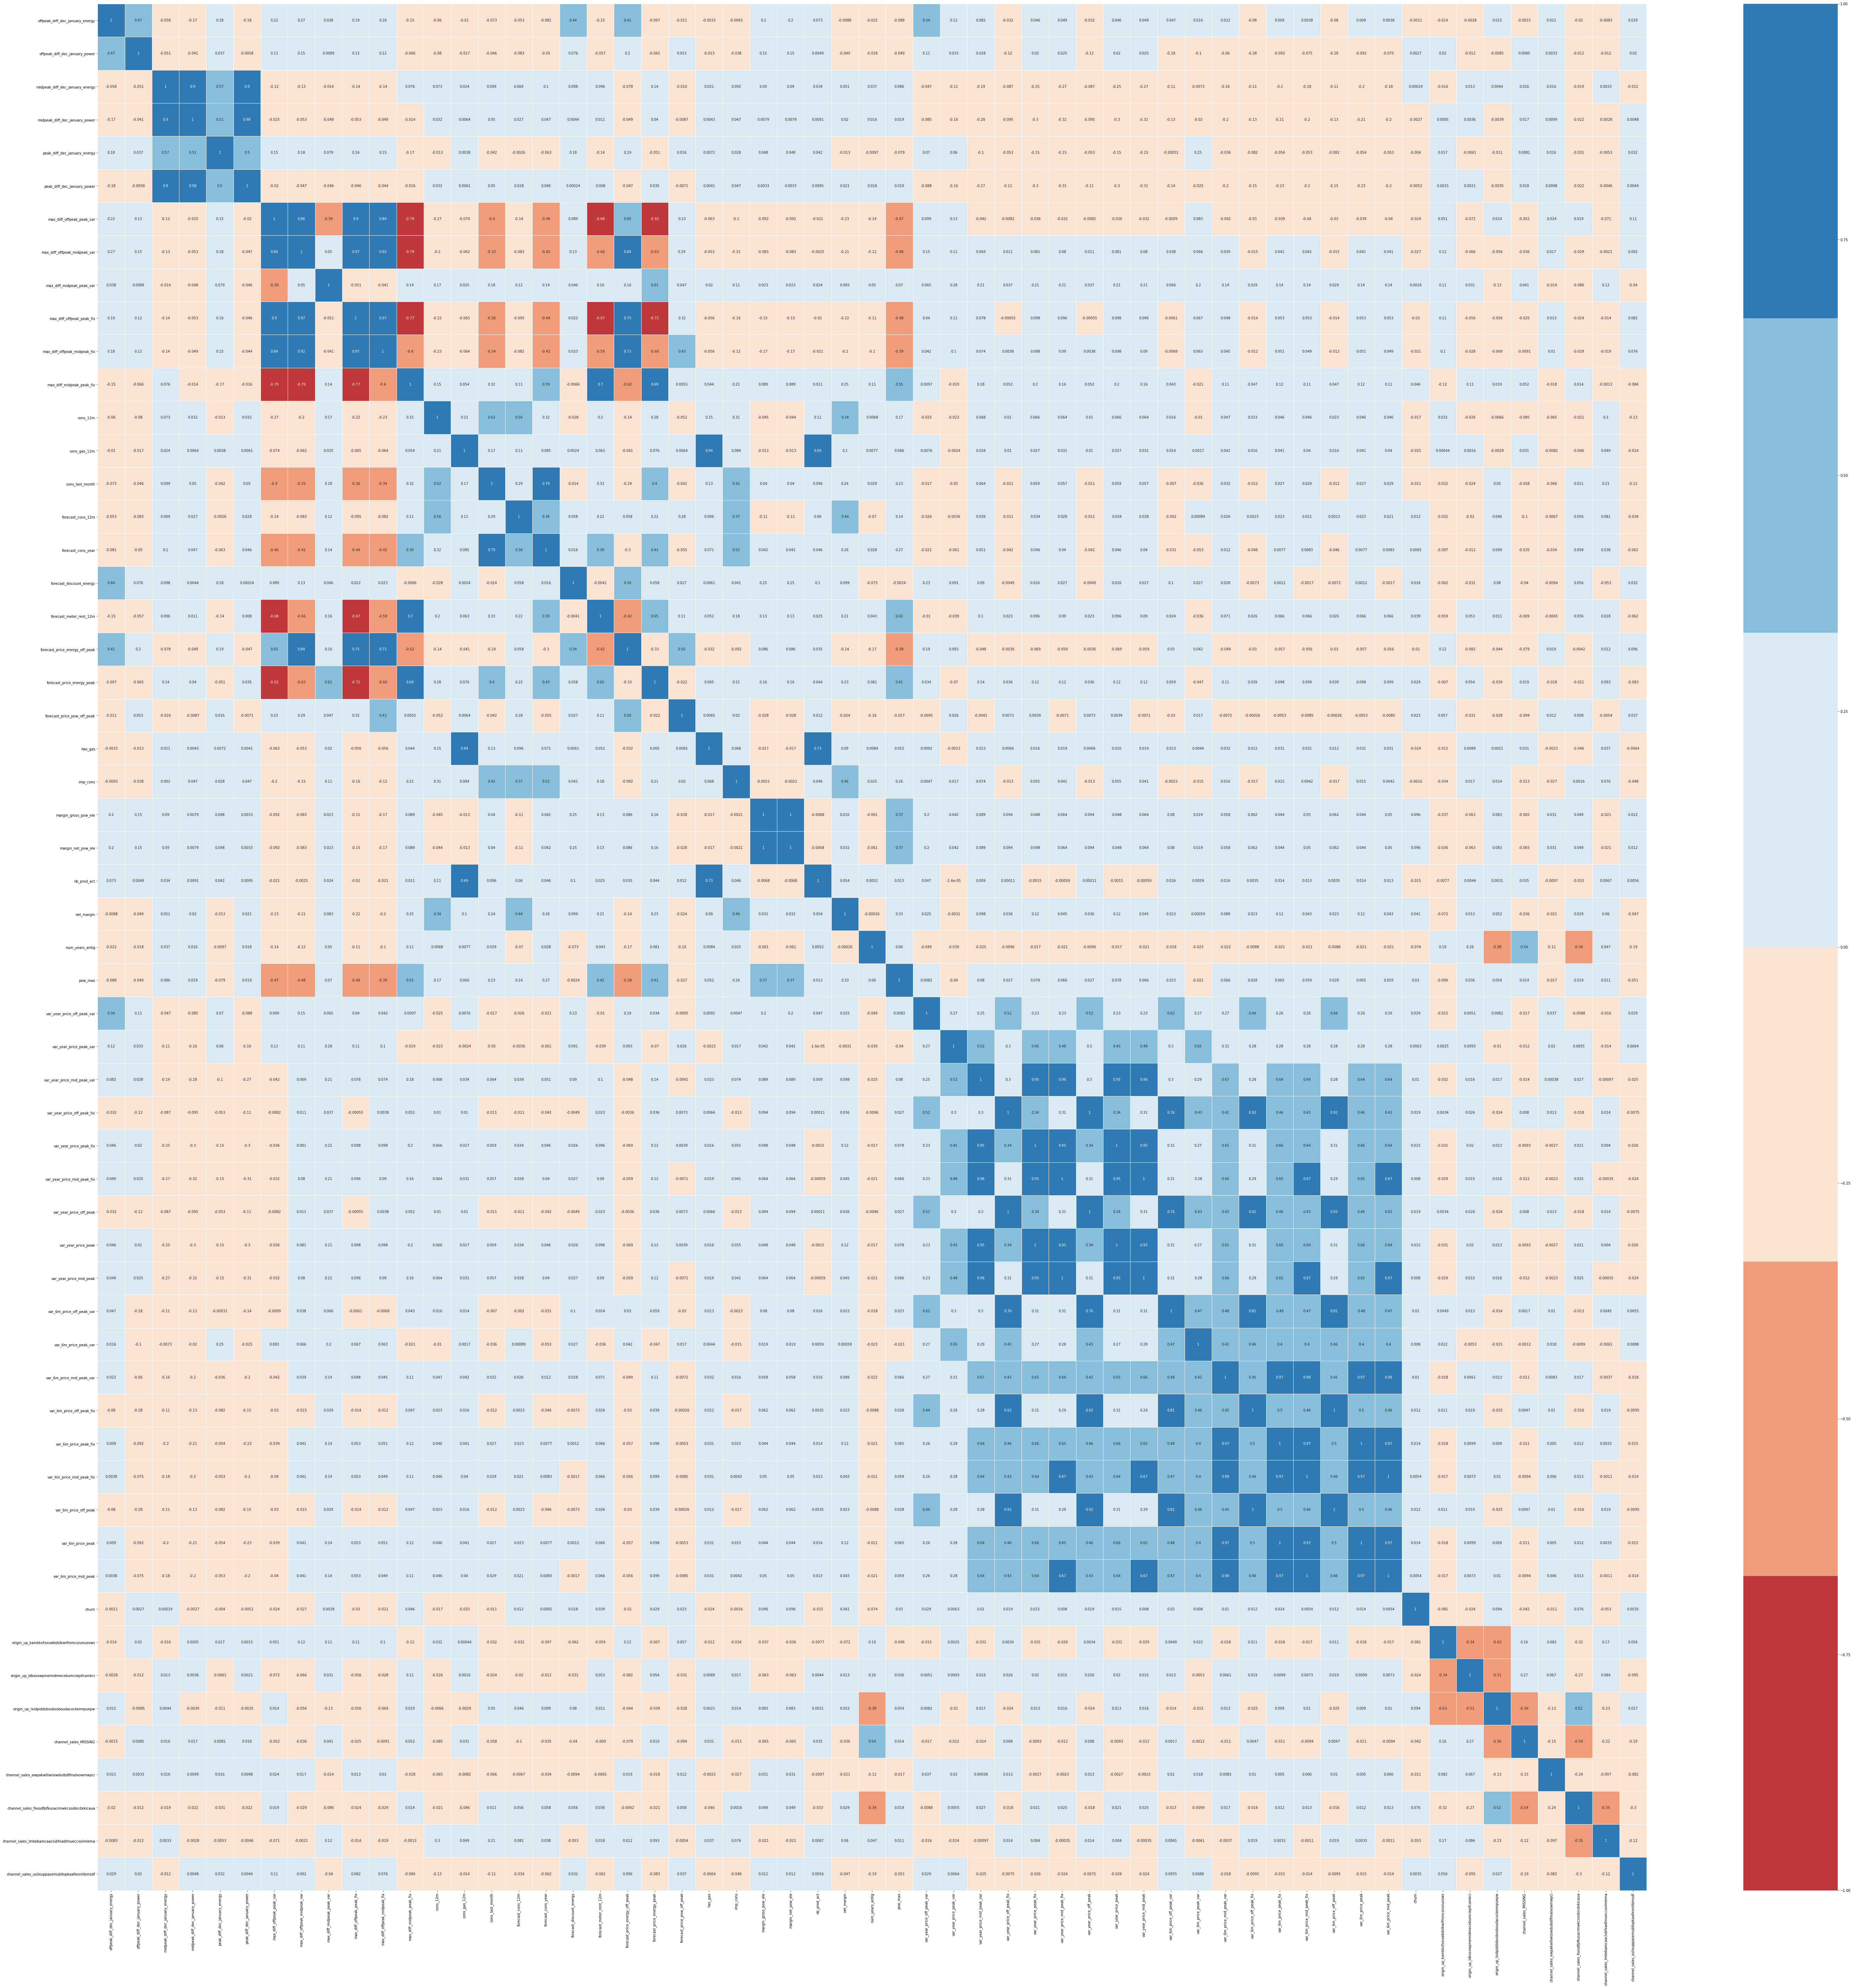

In [29]:
plt.figure(figsize = (100,100))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = sns.color_palette('RdBu'), annot = True, linewidth = .5)
plt.show()